In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Đọc dữ liệu từ file CSV

df = pd.read_csv('bwt.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bwt        1174 non-null   int64
 1   gestation  1174 non-null   int64
 2   parity     1174 non-null   int64
 3   age        1174 non-null   int64
 4   height     1174 non-null   int64
 5   weight     1174 non-null   int64
 6   smoke      1174 non-null   int64
dtypes: int64(7)
memory usage: 64.3 KB


In [25]:
df.describe()

,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [26]:
# Loại bỏ các cột không phải số
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Tính hệ số tương quan giữa các cột số
corr = df_numeric.corr()

# Hiển thị kết quả
print(corr)


                bwt  gestation    parity       age    height    weight  \
bwt        1.000000   0.407543 -0.043908  0.026983  0.203704  0.155923   
gestation  0.407543   1.000000  0.080916 -0.053425  0.070470  0.023655   
parity    -0.043908   0.080916  1.000000 -0.351041  0.043543 -0.096362   
age        0.026983  -0.053425 -0.351041  1.000000 -0.006453  0.147322   
height     0.203704   0.070470  0.043543 -0.006453  1.000000  0.435287   
weight     0.155923   0.023655 -0.096362  0.147322  0.435287  1.000000   
smoke     -0.246800  -0.060267 -0.009599 -0.067772  0.017507 -0.060281   

              smoke  
bwt       -0.246800  
gestation -0.060267  
parity    -0.009599  
age       -0.067772  
height     0.017507  
weight    -0.060281  
smoke      1.000000  


Pearsons correlation: -0.006


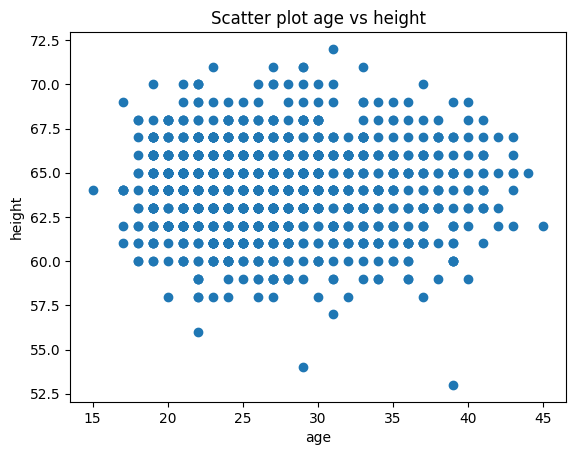

In [29]:
# tính độ tương quan giữa expend và salary
corr, _ = pearsonr(df['age'], df['height'])
print('Pearsons correlation: %.3f' % corr)

# Vẽ biểu đồ và chũ thich rõ ràng
plt.scatter(df['age'], df['height'])
plt.title('Scatter plot age vs height')
plt.xlabel('age')
plt.ylabel('height')
plt.show()


In [30]:
# tính kì vọng của expend, phương sai của expend, độ lệch chuẩn của expend

mean = df['height'].mean()
var = df['height'].var()
std = df['height'].std()


print('Mean: %.3f' % mean)
print('Variance: %.3f' % var)
print('Standard Deviation: %.3f' % std)


Mean: 64.049
Variance: 6.381
Standard Deviation: 2.526


Statistic: 0.9844880877486997, P-value: 7.293085064989089e-10


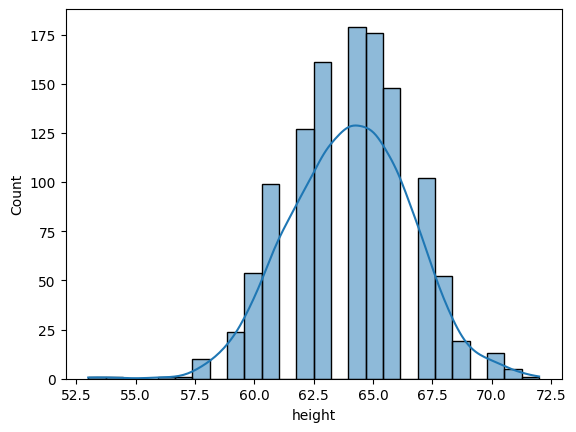

In [31]:
# Phân phối dữ liệu
from scipy.stats import shapiro
import seaborn as sns

# Kiểm tra phân phối chuẩn với Shapiro-Wilk test
stat, p_value = shapiro(df['height'])
print(f'Statistic: {stat}, P-value: {p_value}')

# Vẽ biểu đồ phân phối
sns.histplot(df['height'], kde=True)
plt.show()


In [33]:
from scipy.stats import ttest_ind

# Kiểm định t-test giữa hai nhóm smoke = 0 và smoke = 1
group_smoke_0 = df[df['smoke'] == 0]['age']
group_smoke_1 = df[df['smoke'] == 1]['age']

stat, p_value = ttest_ind(group_smoke_0, group_smoke_1)
print(f'T-statistic: {stat}, P-value: {p_value}')


T-statistic: 2.3254842215625695, P-value: 0.020216083238653048


In [34]:
# Tính trung bình và độ lệch chuẩn cho từng nhóm smoke
group_stats = df.groupby('smoke')['bwt'].agg(['mean', 'std'])
print(group_stats)


             mean        std
smoke                       
0      123.085315  17.423695
1      113.819172  18.295010


parity
0    348.271807
1    299.814406
Name: bwt, dtype: float64


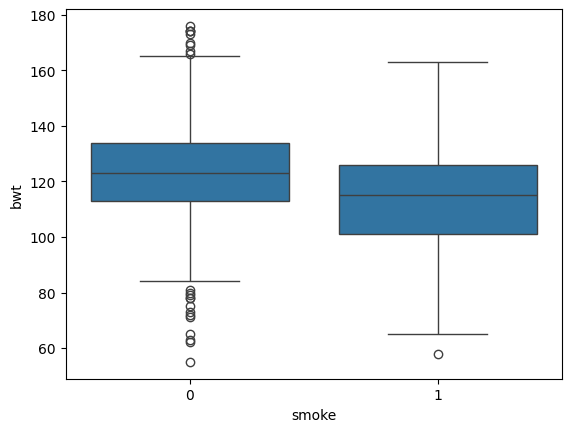

In [35]:
# Tính phương sai cho từng nhóm parity
variance_parity = df.groupby('parity')['bwt'].var()
print(variance_parity)

# Vẽ biểu đồ hộp (box plot) để thể hiện sự phân tán
sns.boxplot(x='smoke', y='bwt', data=df)
plt.show()


In [36]:
# Tính xác suất có điều kiện
prob = len(df[(df['smoke'] == 1) & (df['bwt'] < 88.18)]) / len(df[df['smoke'] == 1])
print(f'Xác suất bà mẹ hút thuốc sinh con dưới 2500 grams: {prob:.2f}')


Xác suất bà mẹ hút thuốc sinh con dưới 2500 grams: 0.09


# =============================================================================

In [38]:
df = pd.read_csv('Sat.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   X           50 non-null     int64  
 2   state       50 non-null     object 
 3   expend      50 non-null     float64
 4   ratio       50 non-null     float64
 5   salary      50 non-null     float64
 6   frac        50 non-null     int64  
 7   verbal      50 non-null     int64  
 8   math        50 non-null     int64  
 9   sat         50 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 4.0+ KB


In [40]:
df.describe()

,Unnamed: 0,X,expend,ratio,salary,frac,verbal,math,sat
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,25.50000,5.905260,16.858000,34.828920,35.240000,457.140000,508.780000,965.920000
std,14.57738,14.57738,1.362807,2.266355,5.941265,26.762417,35.175948,40.204726,74.820558
min,1.00000,1.00000,3.656000,13.800000,25.994000,4.000000,401.000000,443.000000,844.000000
25%,13.25000,13.25000,4.881750,15.225000,30.977500,9.000000,427.250000,474.750000,897.250000
50%,25.50000,25.50000,5.767500,16.600000,33.287500,28.000000,448.000000,497.500000,945.500000
75%,37.75000,37.75000,6.434000,17.575000,38.545750,63.000000,490.250000,539.500000,1032.000000
max,50.00000,50.00000,9.774000,24.300000,50.045000,81.000000,516.000000,592.000000,1107.000000


In [42]:
# check isnull
df.isnull().sum()

Unnamed: 0    0
X             0
state         0
expend        0
ratio         0
salary        0
frac          0
verbal        0
math          0
sat           0
dtype: int64

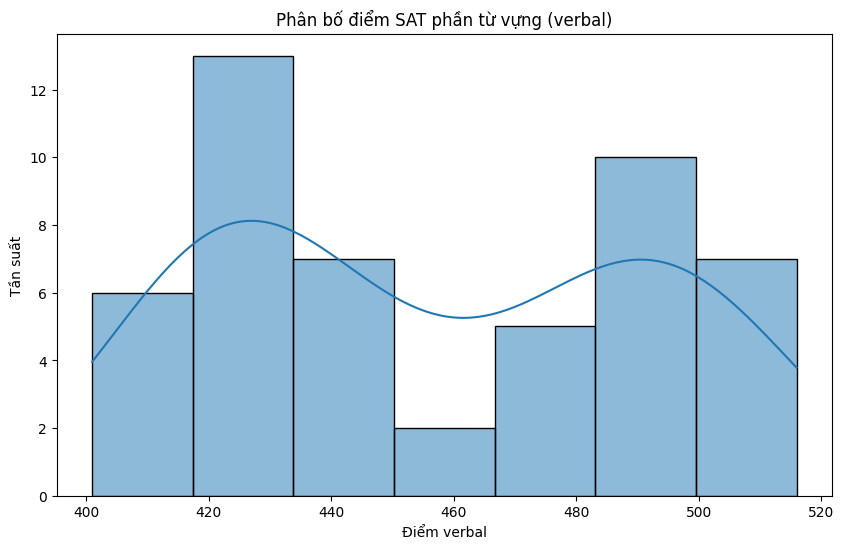

In [44]:

# Câu a) Vẽ biểu đồ phân bố của biến verbal (điểm SAT phần từ vựng)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('sat.csv')

# Vẽ biểu đồ phân bố của biến verbal
plt.figure(figsize=(10,6))
sns.histplot(df['verbal'], kde=True)
plt.title('Phân bố điểm SAT phần từ vựng (verbal)')
plt.xlabel('Điểm verbal')
plt.ylabel('Tần suất')
plt.show()


Hệ số tương quan giữa verbal và math: 0.970


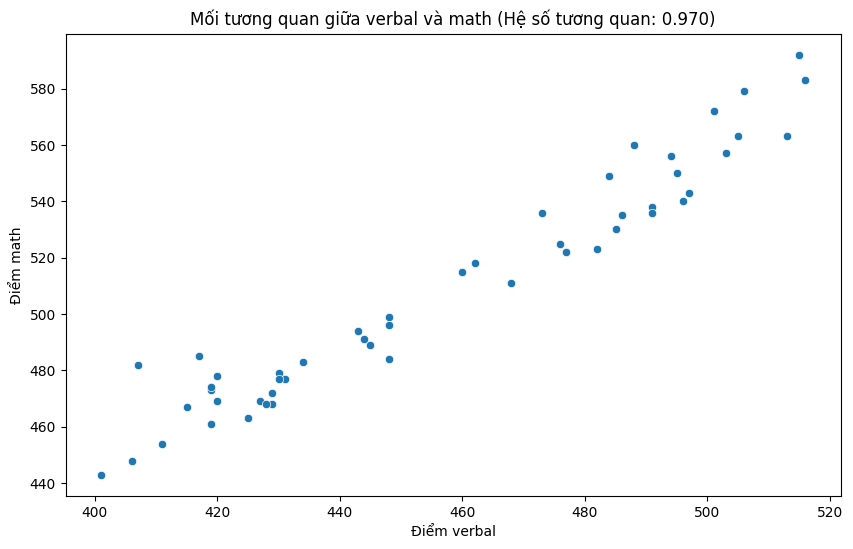

In [46]:
# Câu b) Tính mối tương quan giữa verbal và math và vẽ biểu đồ scatter plot để thể hiện mối tương quan đó
from scipy.stats import pearsonr

# Tính mối tương quan giữa verbal và math
corr, _ = pearsonr(df['verbal'], df['math'])
print(f'Hệ số tương quan giữa verbal và math: {corr:.3f}')

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='verbal', y='math', data=df)
plt.title(f'Mối tương quan giữa verbal và math (Hệ số tương quan: {corr:.3f})')
plt.xlabel('Điểm verbal')
plt.ylabel('Điểm math')
plt.show()


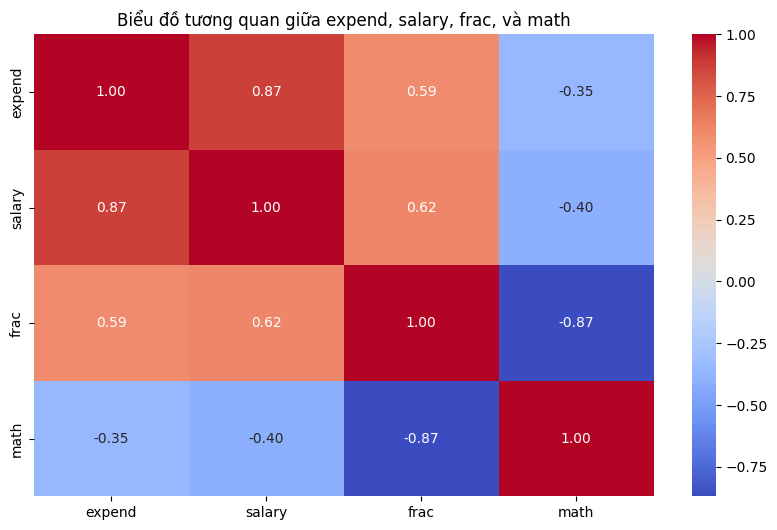

In [47]:
# Câu c) Vẽ biểu đồ tương quan đa biến giữa các biến expend, salary, frac, và math
# Tính ma trận tương quan giữa các biến
corr_matrix = df[['expend', 'salary', 'frac', 'math']].corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Biểu đồ tương quan giữa expend, salary, frac, và math')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     4.816
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0125
Time:                        13:37:03   Log-Likelihood:                -250.48
No. Observations:                  50   AIC:                             507.0
Df Residuals:                      47   BIC:                             512.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        574.9400     50.902     11.295      0.0

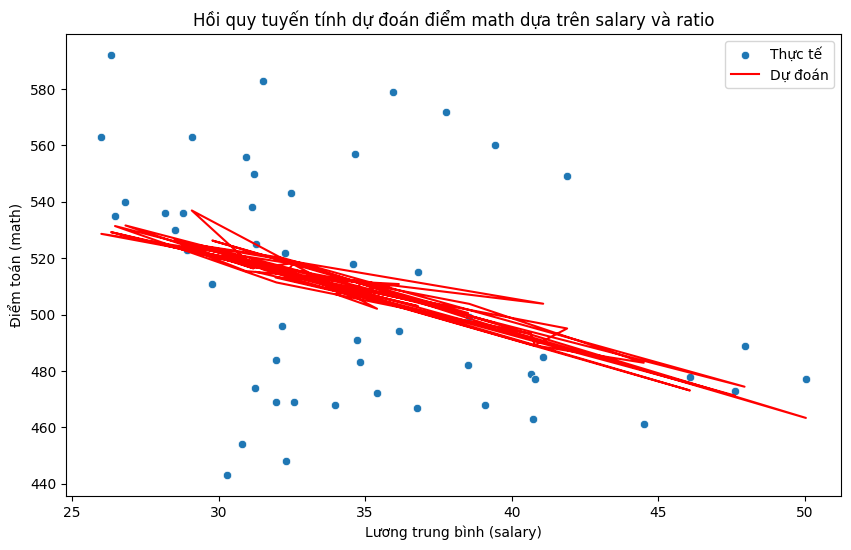

In [52]:
# Câu e) Xây dựng mô hình hồi quy tuyến tính để dự đoán điểm math dựa trên các biến salary và ratio
import statsmodels.api as sm
# Chuẩn bị dữ liệu cho mô hình hồi quy
X = df[['salary', 'ratio']]
y = df['math']

# Thêm hằng số vào mô hình
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy
model = sm.OLS(y, X).fit()

# In kết quả hồi quy
print(model.summary())

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['salary'], y=df['math'], label='Thực tế')
plt.plot(df['salary'], model.predict(X), color='red', label='Dự đoán')
plt.title('Hồi quy tuyến tính dự đoán điểm math dựa trên salary và ratio')
plt.xlabel('Lương trung bình (salary)')
plt.ylabel('Điểm toán (math)')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     4.816
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0125
Time:                        13:37:06   Log-Likelihood:                -250.48
No. Observations:                  50   AIC:                             507.0
Df Residuals:                      47   BIC:                             512.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        574.9400     50.902     11.295      0.0

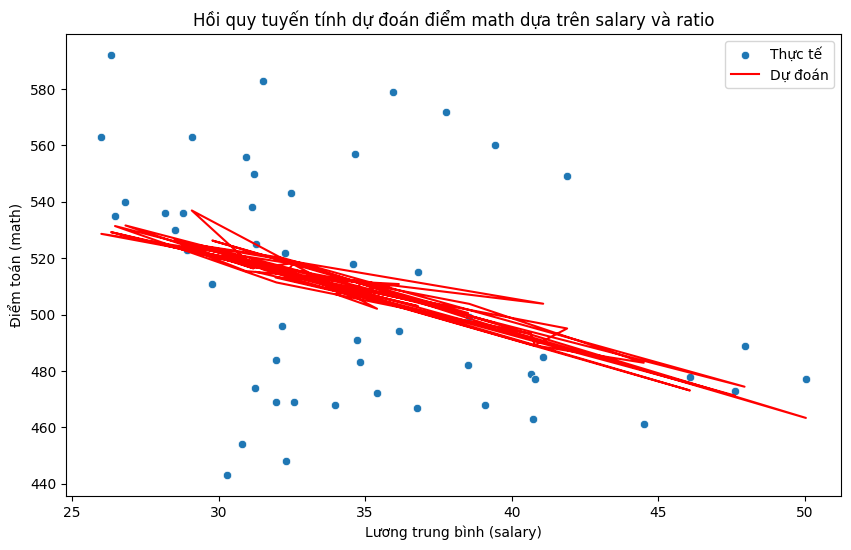

In [53]:
# Chuẩn bị dữ liệu cho mô hình hồi quy
X = df[['salary', 'ratio']]
y = df['math']

# Thêm hằng số vào mô hình
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy
model = sm.OLS(y, X).fit()

# In kết quả hồi quy
print(model.summary())

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['salary'], y=df['math'], label='Thực tế')
plt.plot(df['salary'], model.predict(X), color='red', label='Dự đoán')
plt.title('Hồi quy tuyến tính dự đoán điểm math dựa trên salary và ratio')
plt.xlabel('Lương trung bình (salary)')
plt.ylabel('Điểm toán (math)')
plt.legend()
plt.show()

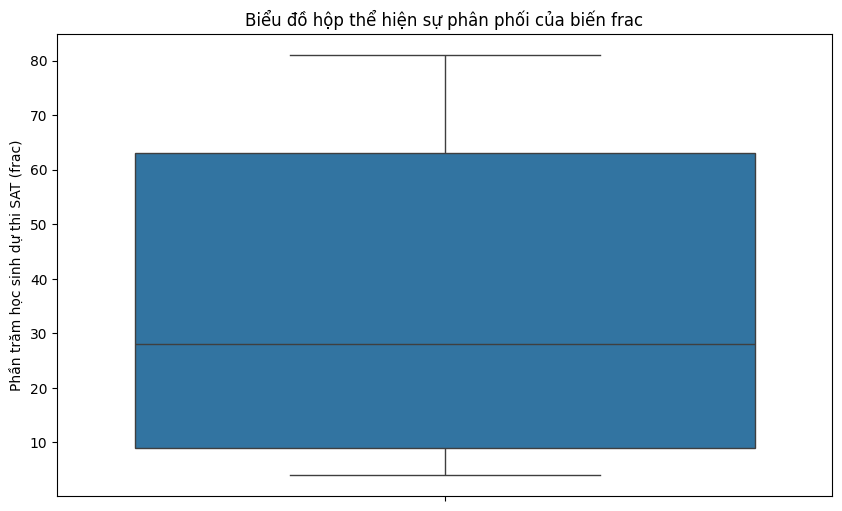

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('sat.csv')

# Vẽ biểu đồ hộp (box plot) cho biến frac
plt.figure(figsize=(10,6))
sns.boxplot(y='frac', data=df)
plt.title('Biểu đồ hộp thể hiện sự phân phối của biến frac')
plt.ylabel('Phần trăm học sinh dự thi SAT (frac)')
plt.show()


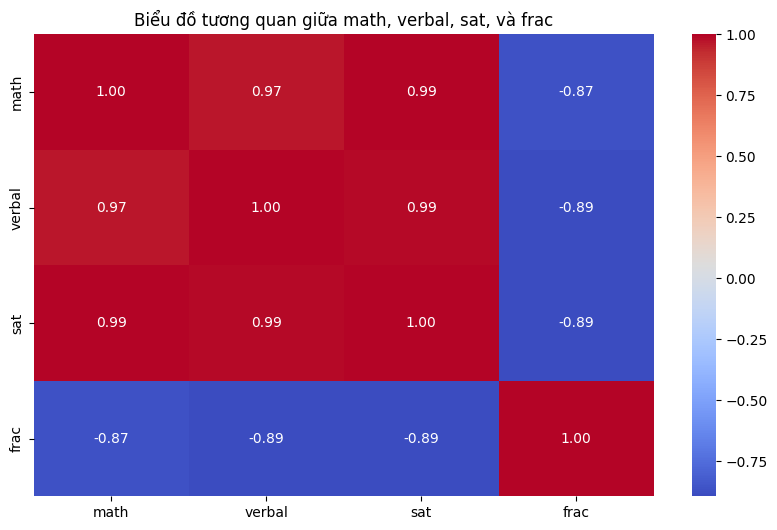

In [55]:
# Tính ma trận tương quan giữa các biến
corr_matrix = df[['math', 'verbal', 'sat', 'frac']].corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Biểu đồ tương quan giữa math, verbal, sat, và frac')
plt.show()


# ===========================================================================================

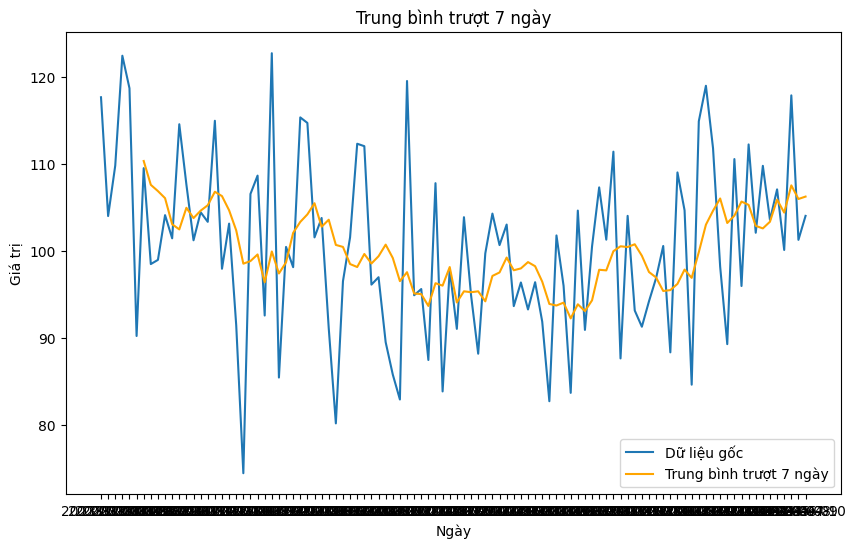

In [59]:
# 1. Tính trung bình trượt (Moving Average)

df = pd.read_csv("Sample_Time_Series_Data.csv")


# Tính trung bình trượt 7 ngày
df['7_day_MA'] = df['value'].rolling(window=7).mean()

# Vẽ biểu đồ trung bình trượt
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['value'], label='Dữ liệu gốc')
plt.plot(df['date'], df['7_day_MA'], label='Trung bình trượt 7 ngày', color='orange')
plt.title('Trung bình trượt 7 ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.legend()
plt.show()


In [ ]:
# 2. Dự báo với mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Chuẩn bị dữ liệu (chọn cột 'value' là giá trị chuỗi thời gian)
train_data = df['value']

# Xây dựng mô hình ARIMA
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA(5,1,0) là một lựa chọn cơ bản
model_fit = model.fit()

# Dự báo trong 30 ngày
forecast = model_fit.forecast(steps=30)

# Vẽ biểu đồ dự báo
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['value'], label='Dữ liệu gốc')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=30, freq='D'), forecast, label='Dự báo 30 ngày', color='red')
plt.title('Dự báo với mô hình ARIMA')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.legend()
plt.show()


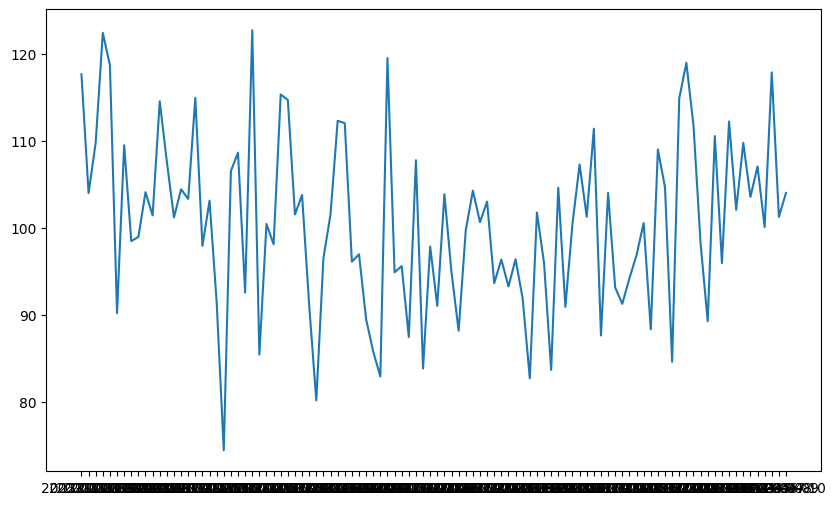

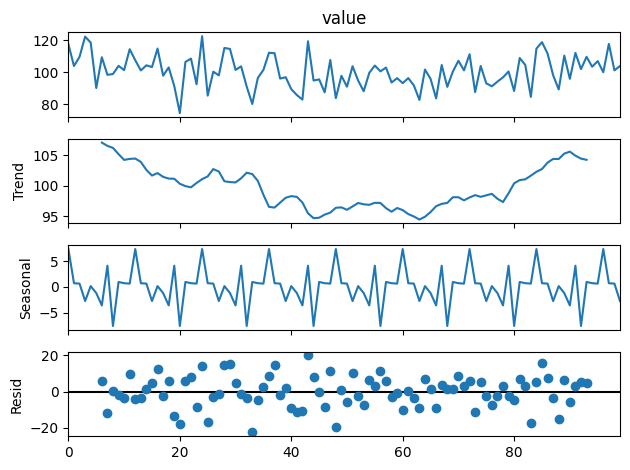

In [62]:
# 3. Phân tích thành phần thời gian (Trend, Seasonality, Residuals)

from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tích thành phần
result = seasonal_decompose(df['value'], model='additive', period=12)

# Vẽ các thành phần
result.plot()
plt.show()


In [ ]:
# 4. Dự báo bằng mô hình Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chuẩn bị dữ liệu
train_data = df['value']

# Xây dựng mô hình Exponential Smoothing
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Dự báo trong 12 tháng
forecast = fit_model.forecast(steps=12)

# Vẽ biểu đồ dự báo
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['value'], label='Dữ liệu gốc')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=12, freq='M'), forecast, label='Dự báo 12 tháng', color='red')
plt.title('Dự báo với Exponential Smoothing')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.legend()
plt.show()



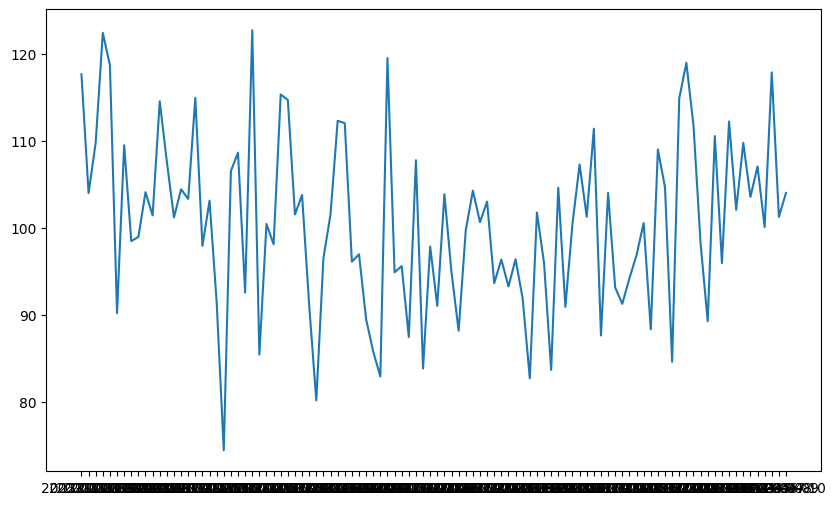

In [76]:
!pip install tools

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/99.1 kB ? eta -:--:--
     ------------------------ --------------- 61.4/99.1 kB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 99.1/99.1 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46738 sha256=0bf5675ca9df4ff910639d299f67842b93459e9146ed8a67888a8331484bfd47
  Stored in directory: c:\users\thong\appdata\local\pip\cache\wheels\c0\d0\70\a33bd4bed2af4f7038b038c16faab552cd0e9d9f4125223a71
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import numpy as np

# Tạo dữ liệu mẫu cho 36 tháng
np.random.seed(0)
date_range = pd.date_range(start='2021-01-01', periods=36, freq='M')
sales = np.random.poisson(lam=200, size=36) + np.arange(36) * 5  # Doanh số giả

# Tạo DataFrame mẫu
df_sales = pd.DataFrame({
    'month': date_range,
    'sales': sales
})

df_sales.head()


C:\Users\thong\AppData\Local\Temp\ipykernel_26148\1374423356.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2021-01-01', periods=36, freq='M')


,month,sales
0,2021-01-31,202
1,2021-02-28,209
2,2021-03-31,207
3,2021-04-30,212
4,2021-05-31,259


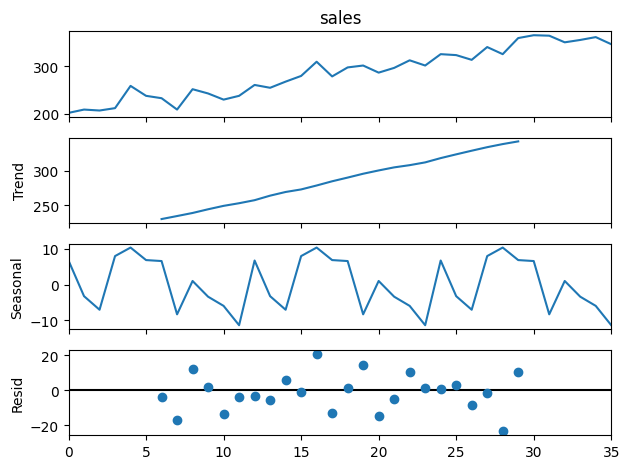

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Phân tích thành phần xu hướng, mùa vụ, và nhiễu
result = seasonal_decompose(df_sales['sales'], model='additive', period=12)

# Vẽ các thành phần
result.plot()
plt.show()


Dự báo doanh số trong 6 tháng tiếp theo:
36    348.646477
37    350.171884
38    350.082912
39    345.949372
40    346.539792
41    347.440809
Name: predicted_mean, dtype: float64


C:\Users\thong\AppData\Local\Temp\ipykernel_26148\3705597808.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_sales['month'].iloc[-1], periods=6, freq='M'), forecast, label='Dự báo', color='red')


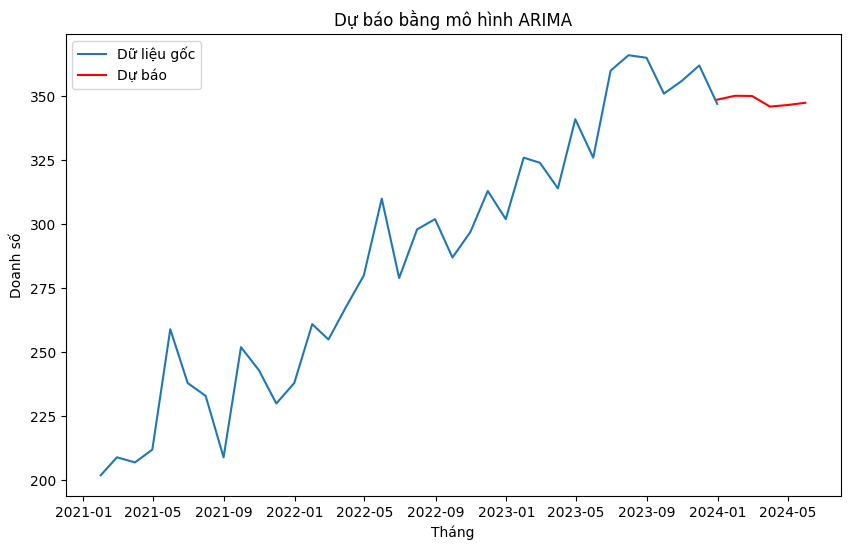

In [80]:
from statsmodels.tsa.arima.model import ARIMA

# Xây dựng mô hình ARIMA (có thể tùy chỉnh order)
model = ARIMA(df_sales['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Dự báo doanh số bán hàng trong 6 tháng tiếp theo
forecast = model_fit.forecast(steps=6)

# Hiển thị kết quả dự báo
print("Dự báo doanh số trong 6 tháng tiếp theo:")
print(forecast)

# Vẽ biểu đồ dữ liệu gốc và dữ liệu dự báo
plt.figure(figsize=(10,6))
plt.plot(df_sales['month'], df_sales['sales'], label='Dữ liệu gốc')
plt.plot(pd.date_range(df_sales['month'].iloc[-1], periods=6, freq='M'), forecast, label='Dự báo', color='red')
plt.title('Dự báo bằng mô hình ARIMA')
plt.xlabel('Tháng')
plt.ylabel('Doanh số')
plt.legend()
plt.show()


C:\Users\thong\AppData\Local\Temp\ipykernel_26148\2043819677.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_sales['month'].iloc[-1], periods=12, freq='M'), forecast, label='Dự báo', color='red')


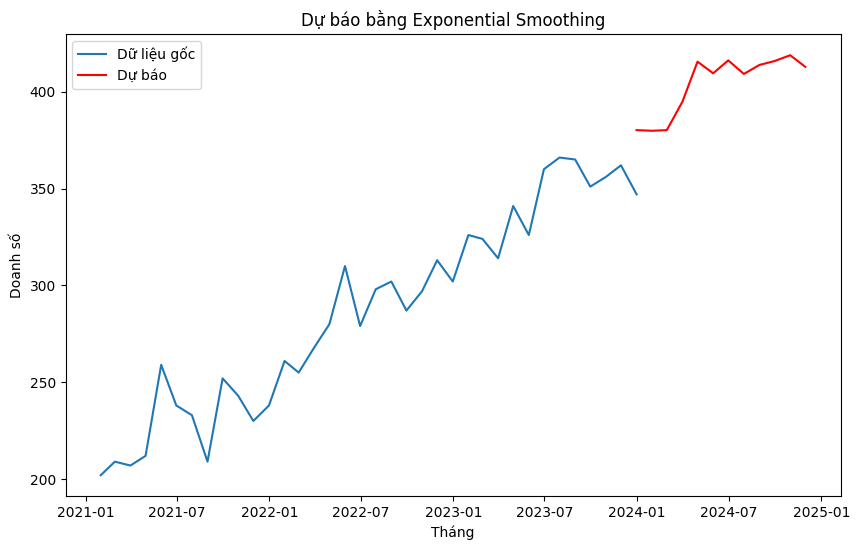

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Xây dựng mô hình Exponential Smoothing
model = ExponentialSmoothing(df_sales['sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Dự báo trong 12 tháng
forecast = fit_model.forecast(steps=12)

# Vẽ biểu đồ dữ liệu gốc và dự báo
plt.figure(figsize=(10,6))
plt.plot(df_sales['month'], df_sales['sales'], label='Dữ liệu gốc')
plt.plot(pd.date_range(df_sales['month'].iloc[-1], periods=12, freq='M'), forecast, label='Dự báo', color='red')
plt.title('Dự báo bằng Exponential Smoothing')
plt.xlabel('Tháng')
plt.ylabel('Doanh số')
plt.legend()
plt.show()


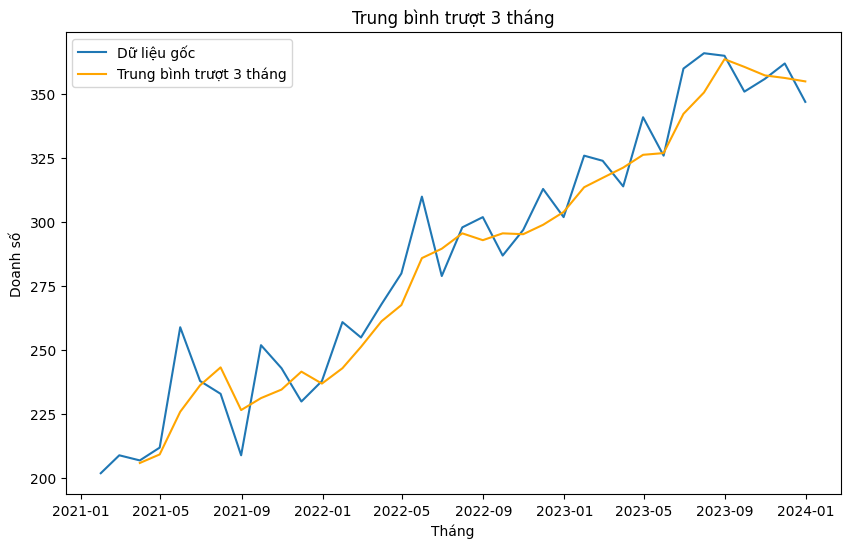

In [82]:
# Tính trung bình trượt 3 tháng
df_sales['3_month_MA'] = df_sales['sales'].rolling(window=3).mean()

# Vẽ biểu đồ trung bình trượt
plt.figure(figsize=(10,6))
plt.plot(df_sales['month'], df_sales['sales'], label='Dữ liệu gốc')
plt.plot(df_sales['month'], df_sales['3_month_MA'], label='Trung bình trượt 3 tháng', color='orange')
plt.title('Trung bình trượt 3 tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh số')
plt.legend()
plt.show()


In [83]:
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính dừng với kiểm định ADF
result = adfuller(df_sales['sales'])
print(f'Statistic: {result[0]}')
print(f'P-value: {result[1]}')

# Kết luận về tính dừng
if result[1] < 0.05:
    print("Chuỗi thời gian có tính dừng.")
else:
    print("Chuỗi thời gian không có tính dừng.")


Statistic: -1.0549411254257637
P-value: 0.7327025125129567
Chuỗi thời gian không có tính dừng.


Hệ số tương quan giữa doanh số và chi phí quảng cáo: 0.922


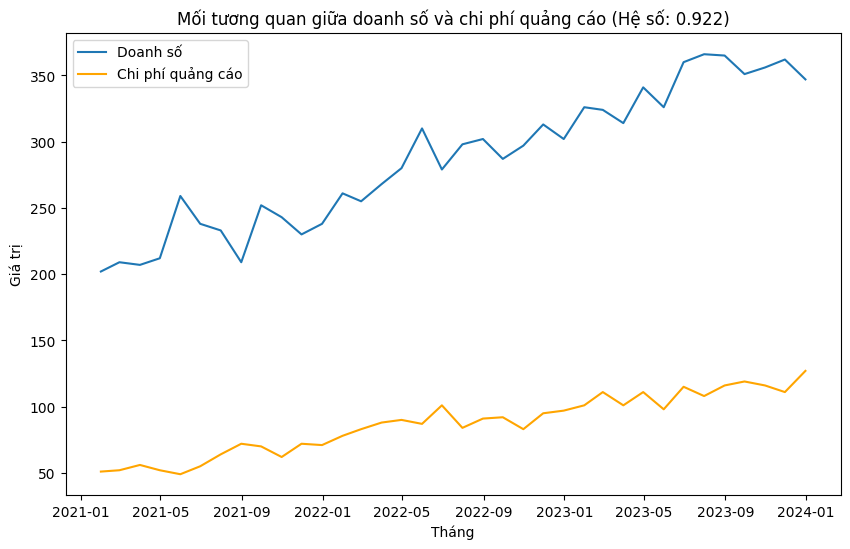

In [84]:
# Tạo thêm chuỗi thời gian giả về chi phí quảng cáo
df_sales['ad_spend'] = np.random.poisson(lam=50, size=36) + np.arange(36) * 2

# Tính hệ số tương quan giữa sales và ad_spend
corr, _ = pearsonr(df_sales['sales'], df_sales['ad_spend'])
print(f'Hệ số tương quan giữa doanh số và chi phí quảng cáo: {corr:.3f}')

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10,6))
plt.plot(df_sales['month'], df_sales['sales'], label='Doanh số')
plt.plot(df_sales['month'], df_sales['ad_spend'], label='Chi phí quảng cáo', color='orange')
plt.title(f'Mối tương quan giữa doanh số và chi phí quảng cáo (Hệ số: {corr:.3f})')
plt.xlabel('Tháng')
plt.ylabel('Giá trị')
plt.legend()
plt.show()
